In [27]:
import os 
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.core.pylabtools import figsize

style.available
style.use('ggplot')

import json

In [2]:
def save_fig(fig_id,IMAGES_PATH, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def Date2Int(x):
    Date = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
    return(10000*Date.year + 100*Date.month + Date.day)

In [3]:
def DataReader(NAME = "FigData",CateList = [],PATH = "",Type = "TXT"):
    if not CateList:
        CateList = ["Clothing_Shoes_and_Jewelry_5","Electronics_5"
                ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                ,"Automotive_5","Sports_and_Outdoors_5"]
    FigData = {}
    for Cate in CateList:
        #ipdb.set_trace()
        FigData[Cate] = {}
        if not PATH: ReaderPATH = os.path.join("",Cate)
        else: ReaderPATH =  os.path.join(PATH,Cate)
        FileList = os.listdir(ReaderPATH)
        for File in FileList:
            if File[:len(NAME)] == NAME:
                if Type == "TXT":
                    with open(os.path.join(ReaderPATH,File),"r") as file:
                        data = file.read()
                    FigData[Cate].update(eval(data))
                if Type == "CSV":
                    data = pd.read_csv(os.path.join(ReaderPATH,File))
                    FigData[Cate].update(data)
                
    return FigData


def SummaryFigDrawer(Yvar,Xvar = "absSScoreAll",Type = "LABEL",FigData = {}
                     ,xvlineloc = [],ColorList = []
                     ,CateList = [],SaveFlag = True,PATH = ""):
    
    if not ColorList: 
        ColorList = ['#2CBDFE','#47DBCD'
                     ,'#F3A0F2','#9D2EC5'
                     ,'#661D98','#F5B14C']
    if not CateList:
        CateList = ["Clothing_Shoes_and_Jewelry_5","Electronics_5"
                ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                ,"Automotive_5","Sports_and_Outdoors_5"]
    
    if not FigData: FigData = DataReader(CateList = CateList,PATH =PATH)
    if not PATH: PATH = ""
    
    fig, ax = plt.subplots(figsize=(10,10))
    for Index, Cate in enumerate(CateList):
        Y = np.array(FigData[Cate][Xvar+Yvar]["Y"]) 
        LABEL = np.array(FigData[Cate][Xvar+Yvar]["Label"])
        Ruler = np.array(FigData[Cate][Xvar+Yvar]["Ruler"])
        Interval = np.array(FigData[Cate][Xvar+Yvar]["Interval"])
        if Type =="LABEL":
            X = LABEL
        elif Type == "Ruler":
            X = Ruler
        else:
            return "Undefined x-axis"

        ax.plot(X,Y,color=ColorList[Index],label = Cate[:-2].replace("_"," "))
        ax.fill_between(X, (Y-Interval), (Y+Interval), color='grey', alpha=.3)
        
    if Type == "LABEL":
        plt.xlim((0,1))
        ax.set_xticks([i*0.05 for i in range(21)])
        ax.set_xticklabels([str(i*5)+"%" for i in range(21)])


    for xloc in xvlineloc:
        ax.axvline(xloc,color="black",alpha = 0.5,ls = "--",linewidth = 2)
    plt.legend()
    if SaveFlag: save_fig("{}_{}".format(Xvar,Yvar),PATH)
    plt.show()
    
def PredictionDrawer(PreData = [],Xvar = "absSScoreAll"
                     ,ColorList = []
                     ,CateList = [],PATH = "",SaveFlag = True):
    
    if not ColorList: ColorList =  ['#2CBDFE','#47DBCD','#F3A0F2','#9D2EC5','#661D98','#F5B14C']
    if not CateList: CateList = ["Clothing_Shoes_and_Jewelry_5","Electronics_5"
                                  ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                                  ,"Automotive_5","Sports_and_Outdoors_5"]
    if not PreData: PreData = DataReader(NAME = "Predictions",CateList = CateList,PATH = PATH)
    if not PATH: PATH = "C:\MY_FILE\Amazon\MinorityReview"
    
    fig, ax = plt.subplots(figsize=(10,10))
    for Index, Cate in enumerate(CateList):
        Y = np.array(PreData[Cate][Xvar]["mean"]) 
        newX = np.array(PreData[Cate][Xvar]["newX"])
        Lower = np.array(PreData[Cate][Xvar]["mean_ci_lower"])
        Upper = np.array(PreData[Cate][Xvar]["mean_ci_upper"])

        ax.plot(newX,Y,color=ColorList[Index],label = Cate[:-2].replace("_"," "))
        ax.fill_between(newX, Lower, Upper, color='grey', alpha=.3)

    plt.legend()
    if SaveFlag: save_fig("PredictionFromPoissono_{}".format(Xvar),PATH)
    plt.show()



In [6]:
CateList = ["Books_5","Clothing_Shoes_and_Jewelry_5","Electronics_5"
                ,"Tools_and_Home_Improvement_5","Cell_Phones_and_Accessories_5"
                ,"Automotive_5","Sports_and_Outdoors_5"]
Path = "Results"

ColorList = ["red",'#2CBDFE','#47DBCD','#F3A0F2','#9D2EC5','#661D98','#F5B14C']

FigData = DataReader(CateList=CateList,PATH= Path)

In [7]:
PreData = DataReader(NAME="Predictions",CateList=CateList,PATH= Path)

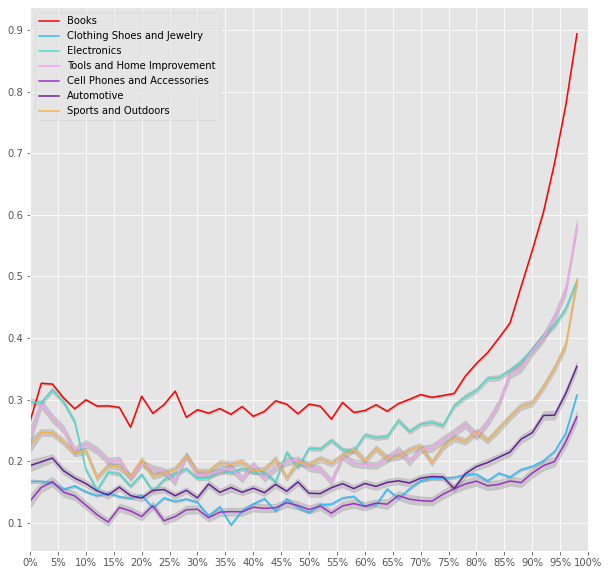

In [9]:
#Figure 2(a)
SummaryFigDrawer(Yvar = "logHelpful",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)

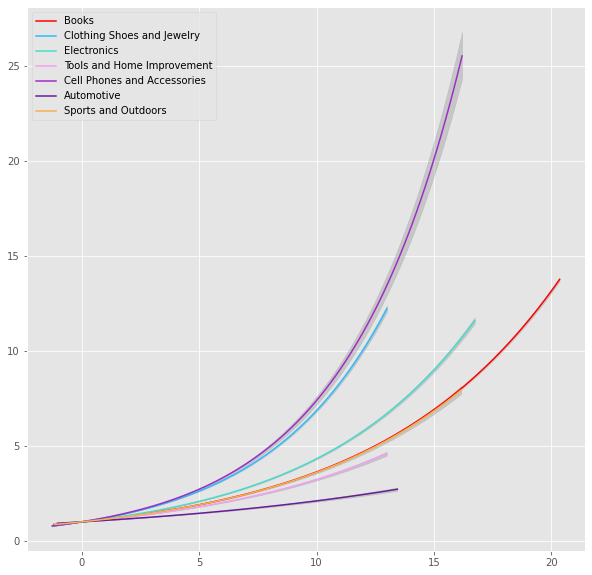

In [10]:
#Figure 2(b)
PredictionDrawer(ColorList= ColorList,CateList=CateList,PreData=PreData,SaveFlag=False)

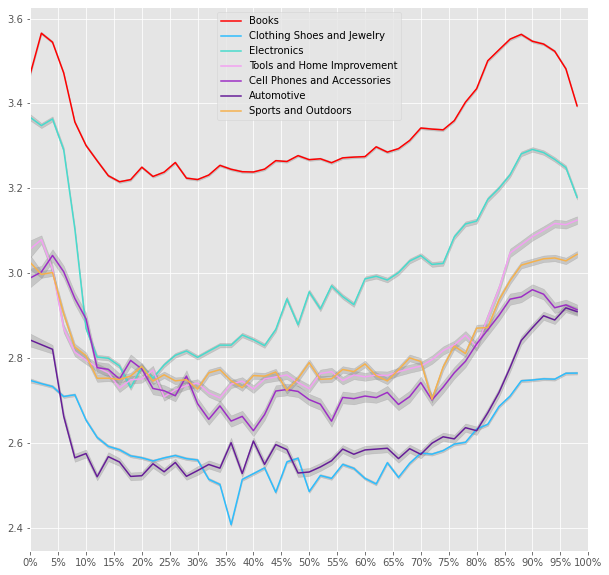

In [12]:
#Figure 3(a)
SummaryFigDrawer(Yvar = "logLength",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)

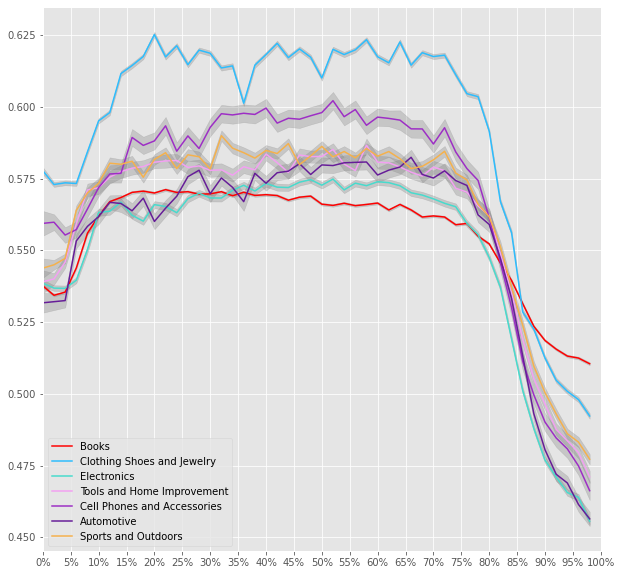

In [13]:
#Figure 3(b)
SummaryFigDrawer(Yvar = "Subjectivity",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)

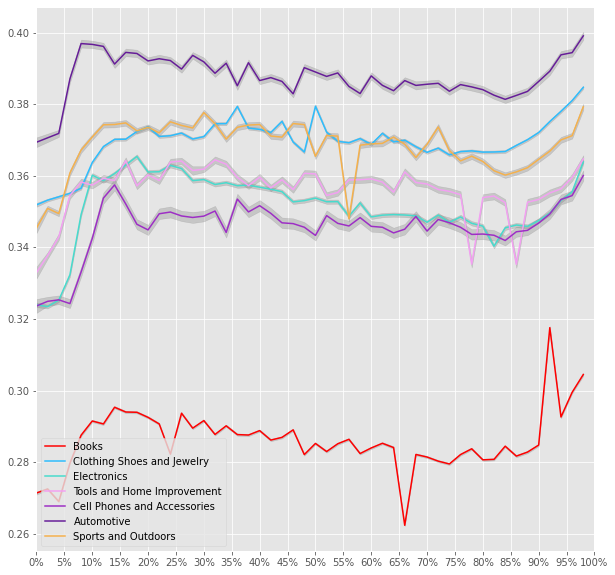

In [14]:
#Figure 3(c)
SummaryFigDrawer(Yvar = "PreDis",FigData = FigData,ColorList= ColorList,CateList=CateList,SaveFlag=False)

In [19]:
fn = os.path.join(Path,"BayesianSimu.json")
with open(fn,"r") as fp:
    data = json.load(fp)

NbinsList = [250,500,750]
Ntrails = [50000,100000,200000]
Thresholds = [5,10,15,20]

In [20]:
Corrs = {}
pvs = {}
Info = {}
for id, Cate in enumerate(CateList):
    Corrs.update({Cate:[]})
    pvs.update({Cate:[]})
    Info.update({Cate:[]})
    for Nbins in NbinsList:
        for threshold in Thresholds:
            for NT in Ntrails:
                Info[Cate].append((Nbins,threshold,int(NT/10000)))
                Corrs[Cate].append(data[Cate][str(Nbins)]["Simu"][str(threshold)][str(NT)]["Corr"][0])
                pvs[Cate].append(data[Cate][str(Nbins)]["Simu"][str(threshold)][str(NT)]["Corr"][1])

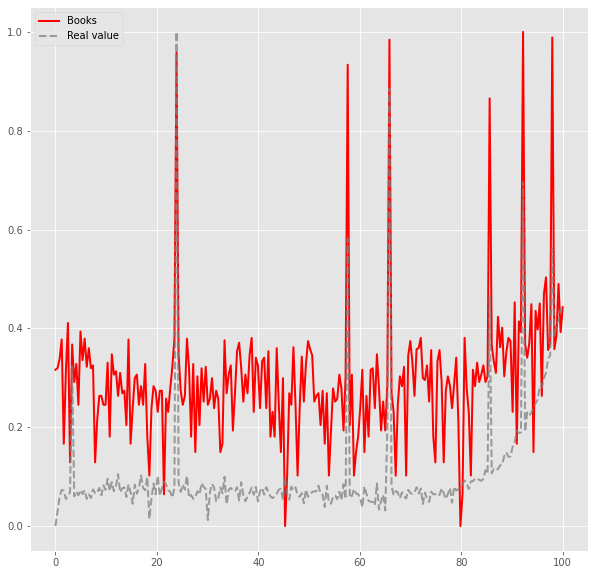

Books_5: 0.765
Clothing_Shoes_and_Jewelry_5: 0.696
Electronics_5: 0.828
Tools_and_Home_Improvement_5: 0.801
Cell_Phones_and_Accessories_5: 0.62
Automotive_5: 0.77
Sports_and_Outdoors_5: 0.638


In [28]:
#Figure 4
figsize(10,10)
scaler = MinMaxScaler()
i = 0
for id, Cate in enumerate(CateList): 
    for Nbins in NbinsList:
        for threshold  in Thresholds:
            for NT in Ntrails:
                plt.figure()
                X = np.linspace(0,100,len(data[Cate][str(Nbins)]["Simu"][str(threshold)][str(NT)]["wins"]))
                Flag = np.logical_and(~np.isnan(data[Cate][str(Nbins)]["Simu"][str(threshold)][str(NT)]["wins"])\
                    , ~np.isnan(data[Cate][str(Nbins)]["Realvalue"]))

                Y = np.squeeze(scaler.fit_transform(np.log1p(data[Cate][str(Nbins)]["Simu"][str(threshold)][str(NT)]["wins"]).reshape(-1,1)))

                plt.plot(X,Y,label=Cate[:-2].replace("_"," "),color = ColorList[id],linewidth = 2)

                Y = np.squeeze(scaler.fit_transform(np.log1p(data[Cate][str(Nbins)]["Realvalue"]).reshape(-1,1)))
                plt.plot(X,Y,linestyle = "--",alpha = 0.75,color = "grey",label = "Real value",linewidth = 2)

                plt.legend()
                #save_fig(Cate+"_{}_{}_{}".format(Nbins,threshold,NT),"")
                if i == 0: plt.show()
                plt.close()
                i += 1


for id, Cate in enumerate(CateList):
    for i in range(len(Corrs[Cate])):
        if Info[Cate][i] == (500,10,10):print("{}: {}".format(Cate,np.round(Corrs[Cate][i],3)))

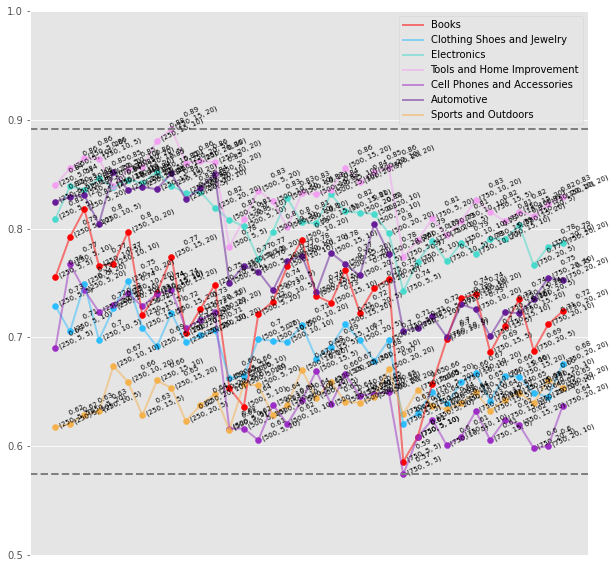

In [30]:
#Figure 5
plt.figure()
MIN = pd.DataFrame(Corrs).min().min()
MAX = pd.DataFrame(Corrs).max().max()
#print(MIN)
#print(MAX)
for id, Cate in enumerate(CateList):
    plt.plot(Corrs[Cate],label=Cate[:-2].replace("_"," "),color = ColorList[id]\
        ,linewidth = 2,alpha = 0.5)
    plt.scatter(np.arange(len(Corrs[Cate])),Corrs[Cate],color = ColorList[id])
    for i in range(len(Corrs[Cate])):
        plt.text(i,Corrs[Cate][i],"      {}\n{}".format(np.round(Corrs[Cate][i],2),Info[Cate][i])\
            ,rotation = 25,fontsize = 7)

plt.axhline(MIN,xmin = 0,xmax = len(Corrs[Cate])-1,linestyle = "--",color= "grey",lw = 2)
#plt.text(int(len(Corrs[Cate])/2)-1,MIN -0.05 ,np.round(MIN,2),rotation = 0,fontsize = 20)
plt.axhline(MAX,xmin = 0,xmax = len(Corrs[Cate])-1,linestyle = "--",color= "grey",lw = 2)
plt.xticks([], minor=True)
plt.ylim(0.5,1)
plt.legend()
#save_fig("Correlations","")

plt.show()
plt.close()
